In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from xgboost import XGBRegressor
%matplotlib inline

In [68]:
train = pd.read_csv("data/train.csv", encoding='utf-8', sep=',')

In [69]:
test = pd.read_csv("data/test.csv", encoding='utf-8', sep=',')

In [70]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [71]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [72]:
type(train)

pandas.core.frame.DataFrame

In [73]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [74]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [75]:
print('Train shape = {0}, Test shape = {1}'.format(train.shape, test.shape))

Train shape = (1460, 81), Test shape = (1459, 80)


In [76]:
X_columns = test.columns

In [77]:
Y_column = 'SalePrice'

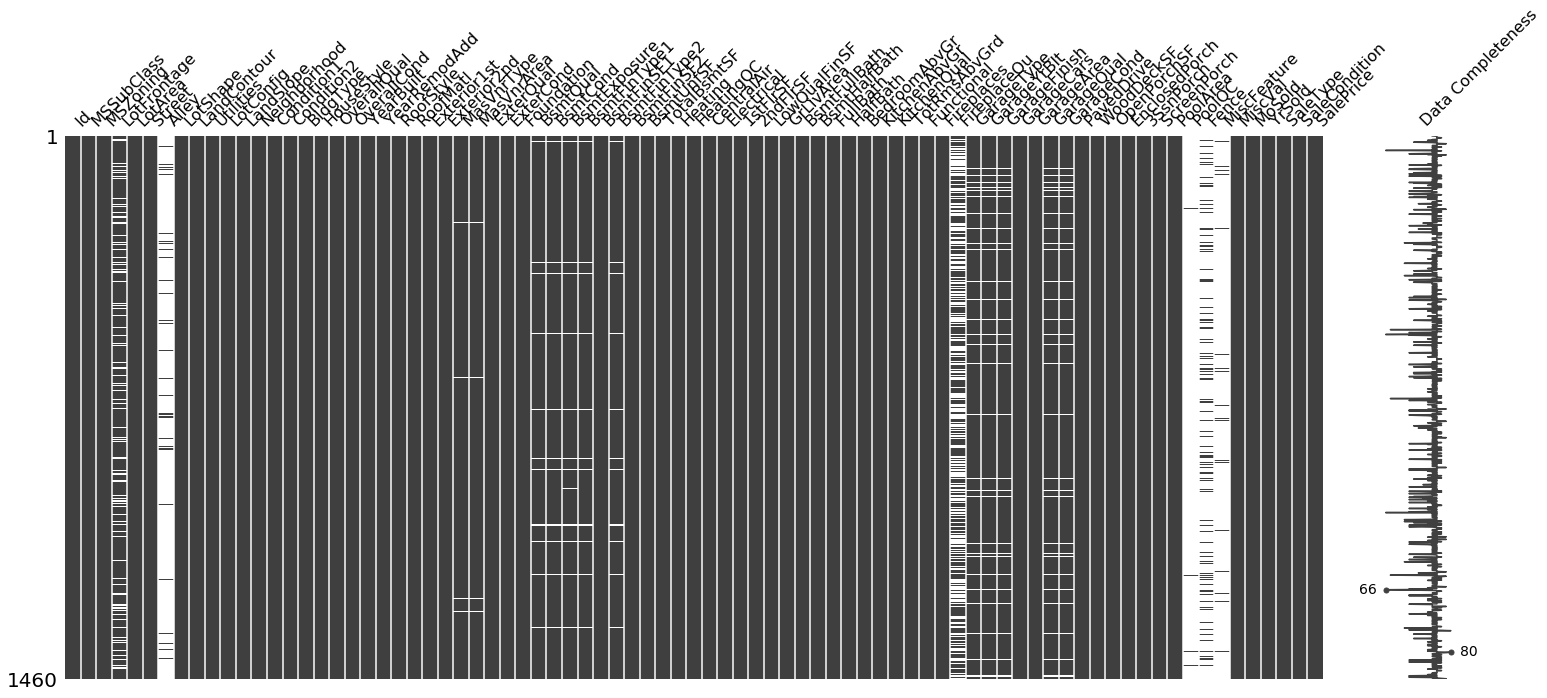

In [78]:
msno.matrix(train, labels = train.columns.tolist())

In [79]:
dim = test.shape

def count_missing(data):
    missings =  dict()
    for col in data.columns.values:
        counter = np.count_nonzero(data[str(col)].isnull().values.ravel())
        if counter != 0:
            missings[str(col)] = counter
    return missings

In [80]:
missings_train = count_missing(train)

In [81]:
missings_train

{'Alley': 1369,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'BsmtQual': 37,
 'Electrical': 1,
 'Fence': 1179,
 'FireplaceQu': 690,
 'GarageCond': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'LotFrontage': 259,
 'MasVnrArea': 8,
 'MasVnrType': 8,
 'MiscFeature': 1406,
 'PoolQC': 1453}

In [82]:
missings_test = count_missing(test)

In [83]:
missings_test

{'Alley': 1352,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFinType1': 42,
 'BsmtFinType2': 42,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtQual': 44,
 'BsmtUnfSF': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Fence': 1169,
 'FireplaceQu': 730,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'GarageCond': 78,
 'GarageFinish': 78,
 'GarageQual': 78,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'KitchenQual': 1,
 'LotFrontage': 227,
 'MSZoning': 4,
 'MasVnrArea': 15,
 'MasVnrType': 16,
 'MiscFeature': 1408,
 'PoolQC': 1456,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

In [84]:
def categories_count(data):
    cat_col = list()
    float_col = list()
    int_col = list()

    for col in data.columns.tolist():
        if data[col].dtype == 'O':
            cat_col.append(col)
        elif data[col].dtype == 'float64':
            float_col.append(col)
        elif data[col].dtype == 'int64' and col != 'i':
            int_col.append(col)
    return cat_col, float_col, int_col

In [85]:
cat_train, float_train, int_train = categories_count(train)

In [86]:
cat_test, float_test, int_test = categories_count(test)

In [87]:
len(cat_train), len(float_train), len(int_train)

(43, 3, 35)

In [88]:
len(cat_test), len(float_test), len(int_test)

(43, 11, 26)

In [89]:
NAs = dict()
NAs['Alley'] = 'NoAlley'
NAs['BsmtCond'] = 'NoBasement'
NAs['BsmtExposure'] = 'NoBasement'
NAs['BsmtFinType1'] = 'NoBasement'
NAs['BsmtFinType2'] = 'NoBasement'
NAs['BsmtQual'] = 'NoBasement'
NAs['Fence'] = 'NoFence'
NAs['FireplaceQu'] = 'NoFireplace'
NAs['GarageCond'] = 'NoGarage'
NAs['GarageFinish'] = 'NoGarage'
NAs['GarageQual'] = 'NoGarage'
NAs['GarageType'] = 'NoGarage'
NAs['GarageYrBlt'] = -1
NAs['LotFrontage'] = 0
NAs['MiscFeature'] = 'Nonee'
NAs['PoolQC'] = 'NoPool'

Imputación de las variables categóricas de las que se tiene constancia

In [90]:
NAs

{'Alley': 'NoAlley',
 'BsmtCond': 'NoBasement',
 'BsmtExposure': 'NoBasement',
 'BsmtFinType1': 'NoBasement',
 'BsmtFinType2': 'NoBasement',
 'BsmtQual': 'NoBasement',
 'Fence': 'NoFence',
 'FireplaceQu': 'NoFireplace',
 'GarageCond': 'NoGarage',
 'GarageFinish': 'NoGarage',
 'GarageQual': 'NoGarage',
 'GarageType': 'NoGarage',
 'GarageYrBlt': -1,
 'LotFrontage': 0,
 'MiscFeature': 'Nonee',
 'PoolQC': 'NoPool'}

In [91]:
def cat_imp(data):
    for col in NAs:
        data[col].fillna(NAs[col], inplace = True)
    return data

In [92]:
train_imp = cat_imp(train)

In [93]:
test_imp = cat_imp(test)

In [94]:
test_imp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NoAlley,Reg,Lvl,AllPub,...,120,0,NoPool,MnPrv,Nonee,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,MnPrv,Nonee,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NoAlley,IR1,Lvl,AllPub,...,0,0,NoPool,NoFence,Nonee,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NoAlley,IR1,HLS,AllPub,...,144,0,NoPool,NoFence,Nonee,0,1,2010,WD,Normal


In [95]:
missings_train = count_missing(train_imp)
missings_train

{'Electrical': 1, 'MasVnrArea': 8, 'MasVnrType': 8}

In [96]:
train_imp.dropna(inplace = True)

In [97]:
missings_train = count_missing(train_imp)
missings_train

{}

In [98]:
missings_test = count_missing(test_imp)
missings_test

{'BsmtFinSF1': 1,
 'BsmtFinSF2': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'BsmtUnfSF': 1,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'GarageArea': 1,
 'GarageCars': 1,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrArea': 15,
 'MasVnrType': 16,
 'SaleType': 1,
 'TotalBsmtSF': 1,
 'Utilities': 2}

In [99]:
for col in test_imp.columns:
    if test_imp[col].dtype in ['int64', 'float64']:
        col_median = test_imp[col].median()
        test_imp[col].fillna(col_median, inplace = True)

In [100]:
missings_test = count_missing(test_imp)
missings_test

{'Exterior1st': 1,
 'Exterior2nd': 1,
 'Functional': 2,
 'KitchenQual': 1,
 'MSZoning': 4,
 'MasVnrType': 16,
 'SaleType': 1,
 'Utilities': 2}

In [101]:
maxi_names = dict()
for col in missings_test.keys():
    maxi = test_imp[col].value_counts().idxmax()
    maxi_names[col] = maxi
    test_imp[col].fillna(maxi, inplace = True)
maxi_names

{'Exterior1st': 'VinylSd',
 'Exterior2nd': 'VinylSd',
 'Functional': 'Typ',
 'KitchenQual': 'TA',
 'MSZoning': 'RL',
 'MasVnrType': 'None',
 'SaleType': 'WD',
 'Utilities': 'AllPub'}

In [102]:
missings_test = count_missing(test_imp)
missings_test

{}

In [103]:
le = LabelEncoder()

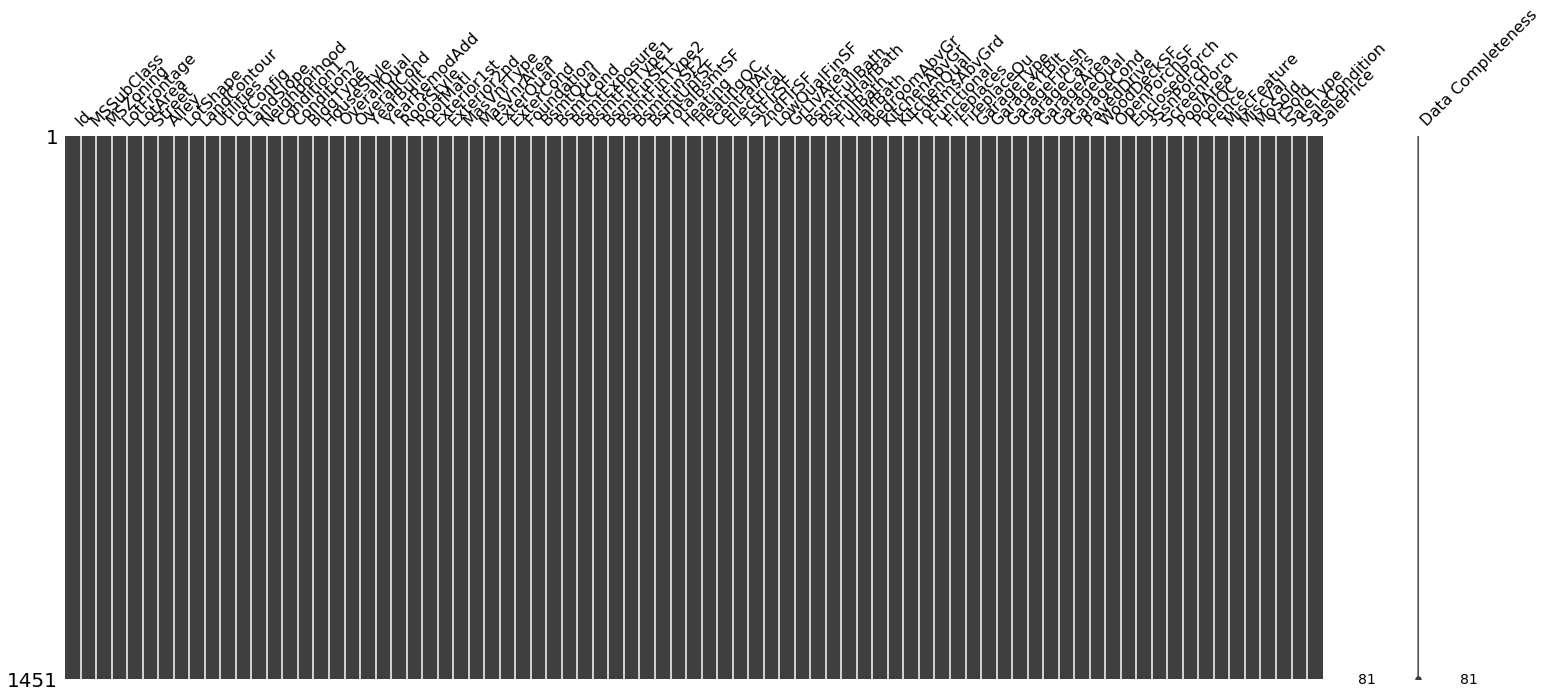

In [104]:
msno.matrix(train_imp, labels = train.columns.tolist())

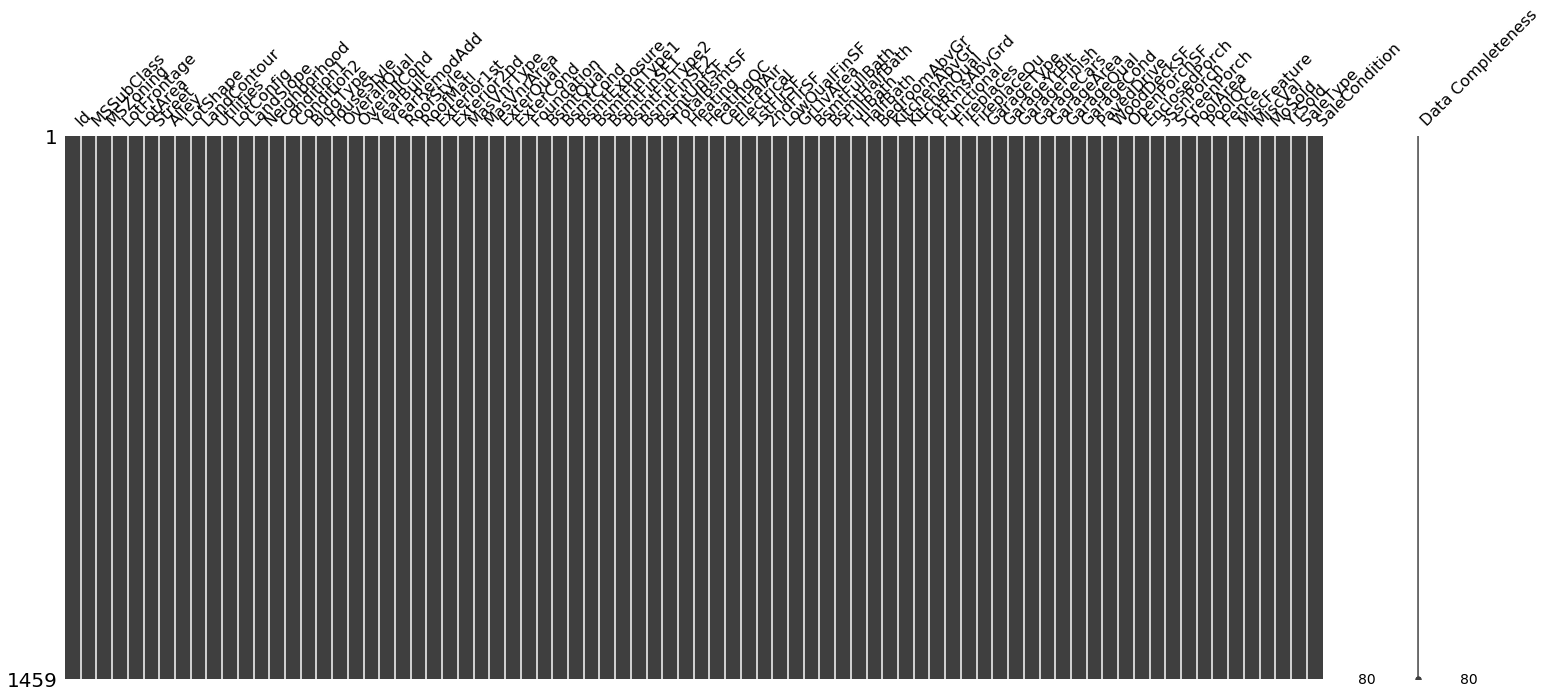

In [105]:
msno.matrix(test_imp, labels = train.columns.tolist())

In [106]:
for col in train_imp.columns:
    if train_imp[col].dtype == 'object':
        print(col)
        train_imp[col] = le.fit_transform(train_imp[col])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [107]:
for col in test_imp.columns:
    if test_imp[col].dtype == 'object':
        print(col)
        test_imp[col] = le.fit_transform(test_imp[col])

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [108]:
test_imp.shape

(1459, 80)

In [109]:
train_imp.shape

(1451, 81)

In [110]:
train_imp.to_csv('data/pre_train.csv', sep = ',', index = False)

In [111]:
test_imp.to_csv('data/pre_test.csv', sep = ',', index = False)